In [1]:
# Least square regression for non-linear function

A least squares regression requires that the estimation function be a linear combination of basis func-
tions. There are some functions that cannot be put in this form, but where a least squares regression is
still appropriate.

In [2]:
# Log tricks for exponential function

Assume you have a function in the form ŷ(x) = α.exp(βx) and data for x and y, and that you want to
perform least squares regression to find α and β. Clearly, the previous set of basis functions (linear)
would be inappropriate to describe ŷ(x); however, if we take the log of both sides, we get log(ŷ(x)) =
log(α) + βx. Now, we see that if ỹ(x) = log(ŷ(x)) and α̃ = log(α), then ỹ(x) = α̃ + βx. Thus, we can
perform a least squares regression on the linearized expression to find ỹ(x), α̃, and β, and then recover
α by using the expression α = exp(α̃ ).

In [24]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [25]:
plt.style.use("seaborn-poster")

In [26]:
# generate x and y, and add some noise into y

x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))

Text(0, 0.5, 'y')

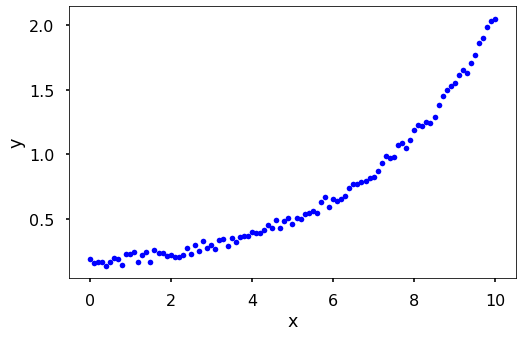

In [33]:
# Plotting the data

plt.figure(figsize = (8,5))
plt.plot (x, y, "b.")
plt.xlabel ("x")
plt.ylabel ("y")

In [28]:
A = np.vstack([x, np.ones(len(x))]).T # adding additional row of the same length as x and then transposing it.
A.shape

(101, 2)

In [29]:
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f"alpha parameter = {alpha} and beta parameter = {beta}")

alpha parameter = 0.1388697418615103 and beta parameter = 0.26270471019505043


Text(0, 0.5, 'y')

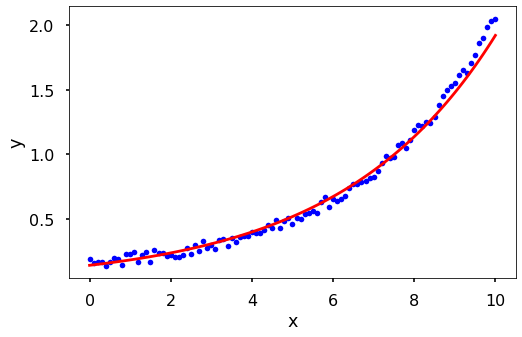

In [32]:
# fitting the plot
plt.figure(figsize = (8,5))
plt.plot(x, y, "b.")
plt.plot(x, alpha*np.exp(beta*x), "r")
plt.xlabel("x")
plt.ylabel("y")

In [34]:
# Polynomial directed equation fitting of data set

f (x) = an x n + an−1 x n−1 + · · · + a2 x 2 + a1 x 1 + a0
where an , an−1 , . . . , a2 , a1 , a0 are the real number coefficients, and n, a non-negative integer, is the
order or degree of the polynomial. If we have a set of data points, we can use different orders of
polynomials to fit it. The coefficients of the polynomials can be estimated using the least squares
method as before, i.e., minimizing the error between the real data and the polynomial fitting results.

[-0.19        0.54888889]
[ 0.01385281 -0.30082251  0.67818182]
[ 0.03291246 -0.38109668  0.89060847  0.12525253]
[-0.00568182  0.12382155 -0.83320707  1.59840067 -0.01111111]
[ 4.48717949e-04 -1.46561772e-02  1.86392774e-01 -1.00970280e+00
  1.76572261e+00 -2.30769231e-02]
[ 0.00085185 -0.01999573  0.16926638 -0.57562743  0.4085531   0.8475812
 -0.00449106]


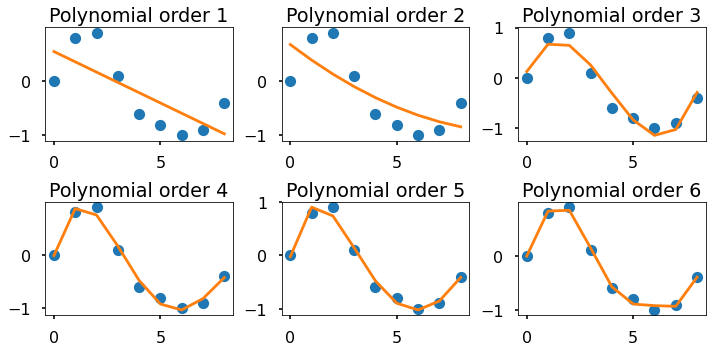

In [49]:
u = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
v = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize = (10,5))

for i in range(1,7):
    
    # The polynomial coefficients
    
    y = np.polyfit(u, v, i)    
    # i value in the bracket represents the ith order of the fitting
    # where as u is the grid and v is the fucntion value at grid points
    # y stores the value of coefficient from the corresponding ordering
    # 1st order contains two coefficients, a0 and a1
    
    plt.subplot(2, 3, i)
    plt.plot(u, v, "o")     # u is the grid and v is function value
    
    # evaluate the value for polynomial
    plt.plot(u, np.polyval(y, u))   
    plt.title(f"Polynomial order {i}")
   
    # Polyval contains value of fitted line with ith order at grid points
    print(y)
plt.tight_layout()